# HANDS ON 2

Bagus Ardin Saputra (120140176)


#### Menentukan Jenis Soal Yang Akan Di Kerjakan

Nim Genap Kerjakan Fading Exponential
Nim Ganjil Kerjakan Logarithmic Scale Fading


In [1]:
nim = 120140176
if int(str(nim)[8])%2 == 0:
    print('Genap')
else:
    print('Ganjil')

Genap


Siapa sangka, ternyata saya nim genap
<br>
<img src="assets/siapa sangka.jpg" alt="ini_watermark_(120140176).jpeg" width="320" >


### Fading Exponential

Karena nim saya genap, sesuai dengan ketentuan saya akan mencoba teknik fading exponential. Khususnya pada bagian awal dan akhir audio percobaan.


In [2]:
import os
import wave
import numpy as np
import matplotlib.pyplot as plt

In [3]:
parent_path = 'datasets_ho2'
datasets = []
for i in os.listdir(parent_path):
    datasets.append(
        os.path.join(os.getcwd(), parent_path, i)
    )

for i in datasets:
    if not os.path.exists(i):
        print('Data tidak ditemukan')

for i in datasets:
    print(i, end="\n")

c:\Users\hendr\if4021\datasets_ho2\ho_2.wav


Langkah pertama sebelum melakukan percobaan, kita harus memuat datasets yang diperlukan. Pada tahap ini, kita menggunakan library os untuk mendapatkan daftar [path](https://docs.oracle.com/javase/tutorial/essential/io/path.html) datasets yang diperlukan.


In [4]:
file_index = 0 # Alih alih pakai semua datasets seperti dalam percobaan handson 1, sekarang kita ambil satu aja. Index path nya kita define di sini aja biar ga typo

In [5]:

with wave.open(datasets[file_index], 'r') as wav_file:
    params = wav_file.getparams()

print(f"Jumlah Sampel: {params.nframes}")
print(f"Frekuensi: {params.framerate} Hz")
print(f"Jenis Audio: {'Stereo' if params.nchannels==2 else 'Mono'}")

Jumlah Sampel: 561393
Frekuensi: 44100 Hz
Jenis Audio: Stereo


Kalian nampak tu, channelnya masih 2. Ada 2 cara yang bisa kita lakukan, yaitu pisah channel dan ambil salah satunya atau kita gabungin. Tapi karena sebelumnya kita udah pernah misah channel audio, sekarang saya pengen eksperimen buat nyatuin channelnya, biar audionya jadi mono.


In [6]:
# Kita load lagi audionya

output_path = os.path.join('sounds_mono', os.path.basename(datasets[file_index])) # Bikin folder output baru
with wave.open(datasets[file_index], 'rb') as wav_file:
    params = wav_file.getparams()
    audio_data = np.frombuffer(wav_file.readframes(params.nframes), dtype=np.int16)

    lc = audio_data[0::2] # channel kiri 
    rc = audio_data[1::2] # channel kanan

    audio_mono = ((lc+rc)//2).astype(np.int16)

    with wave.open(output_path, 'wb') as output_sound:
        output_sound.setnchannels(1)
        output_sound.setsampwidth(params.sampwidth)
        output_sound.setframerate(params.framerate)
        output_sound.writeframes(audio_mono.tobytes())

Kita udah bikin file audio dengan satu channel. Kalo ga percaya, sekarang kita coba test buka file yang baru


In [7]:
with wave.open(output_path, 'r') as mono_wav:
    audio = mono_wav.getparams()
    audio_content = mono_wav.readframes(audio.nframes)

print(audio.nchannels)

1


Sekarang channelnya jadi satu, yang artinya sound kita udah jadi mono. Sesuai dengan ketentuan percobaan, kita hanya akan melakukan secara _exponential_ pada bagian awal dan akhir audio. Ada beberapa cara mudah, namun cara yang saya ambil adalah yang paling simpel yaitu, **Gausah dikerjain**

In [8]:
# Periksa dulu audio yang sudah kita manipulasi sebelumnya, apakah ada perubahan selain dari jumlah channelnya.
print(f"Frekuensi: {audio.framerate} Hz")
print(f"Jumlah Sampel: {audio.nframes}")
print(f"Jenis Audio: {'Stereo' if audio.nframes == 2 else 'Mono'}")

Frekuensi: 44100 Hz
Jumlah Sampel: 561393
Jenis Audio: Mono


Setelah dipastikan bahwa proses perubahan channel pada audio berhasil, selanjutnya kita akan melakukan visualisasi audio.

In [9]:
time_axis = np.linspace(0, audio.nframes/audio.framerate, audio.nframes)

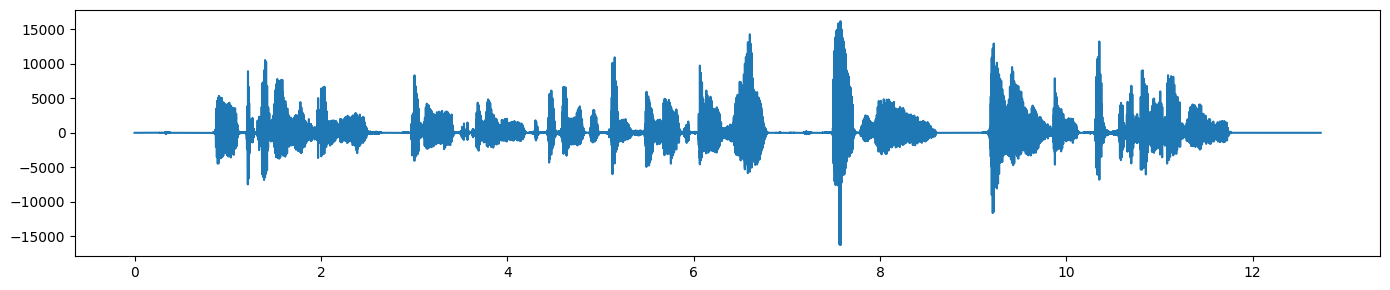

In [10]:
plt.figure(figsize=(14, 3))
plt.plot(
    time_axis,
    np.frombuffer(audio_content, dtype=np.int16)
    )
plt.tight_layout()
plt.show()

Ini adalah visualisasi dari audio asli yang sebelumnya sudah dilakukan manipulasi untuk merubah jumlah channelnya. Dapat dilihat bahwa audio ini memiliki durasi sekitar 13 detik. Visualisasi audio ini dapat digunakan untuk mementukan tingkat keberhasilan kita dalam melakukan fading exponential terhadap audio pada bagian awal dan akhir. Namun sebelum menerapkan fading, kita perlu menentukan bagaimana fading pada audio akan digunakan. Untuk itu, kita memerlukan kurva, sehingga nantinya kita akan terlebih dahulu mengetahui gambaran umum bagaimana hasil akhir setelah audio diterapkan fading exponential. 

In [11]:
fading_time = 3 # menentukan panjang fading
samples = fading_time * audio.framerate

time_axis = np.linspace(0, fading_time, samples)

In [12]:
fade_in_curve = (1-np.exp(-10 * time_axis / fading_time) * (1 + .5 * np.sin(10 * np.pi * time_axis)))
fade_out_curve = np.exp(-10 * time_axis / fading_time) * (1 + .5 * np.sin(10 * np.pi * time_axis))

Pada blok kode di atas, kita telah membuat kurva untuk fade in dan fade out. Sedikit spoiler terkait dengan kurva yang dibuat, untuk fade in kurva akan naik secara signifikan pada dengan ketajam ```10```, sedangkan untuk fade out kurva akan turun secara signifikan. Untuk lebih jelasnya, kurva yang telah dibuat akan di visualisasikan dibawah.

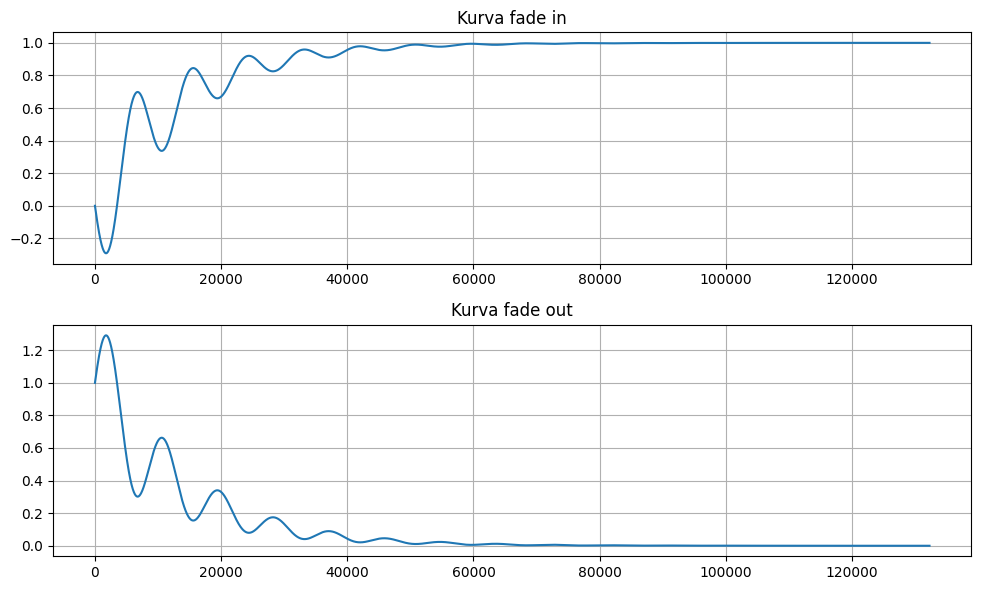

In [13]:
ax, fig = plt.subplots(2, 1, figsize=(10, 6))
fig[0].plot(fade_in_curve, label='fade in')
fig[0].set_title("Kurva fade in")
fig[0].grid()
fig[1].plot(fade_out_curve, label='fade out')
fig[1].set_title("Kurva fade out")
fig[1].grid()
plt.tight_layout()
plt.show()

# Memasukkan Fading Ke Audio

Kalau sudah dibuat, selanjutnya akan kita terapkan kedalam audio kita. Biar apa? Biar lo nanya

In [14]:
audio_fadding = np.frombuffer(audio_content, dtype=np.int16).copy()

audio_fadding[:samples] = audio_fadding[:samples] * fade_in_curve

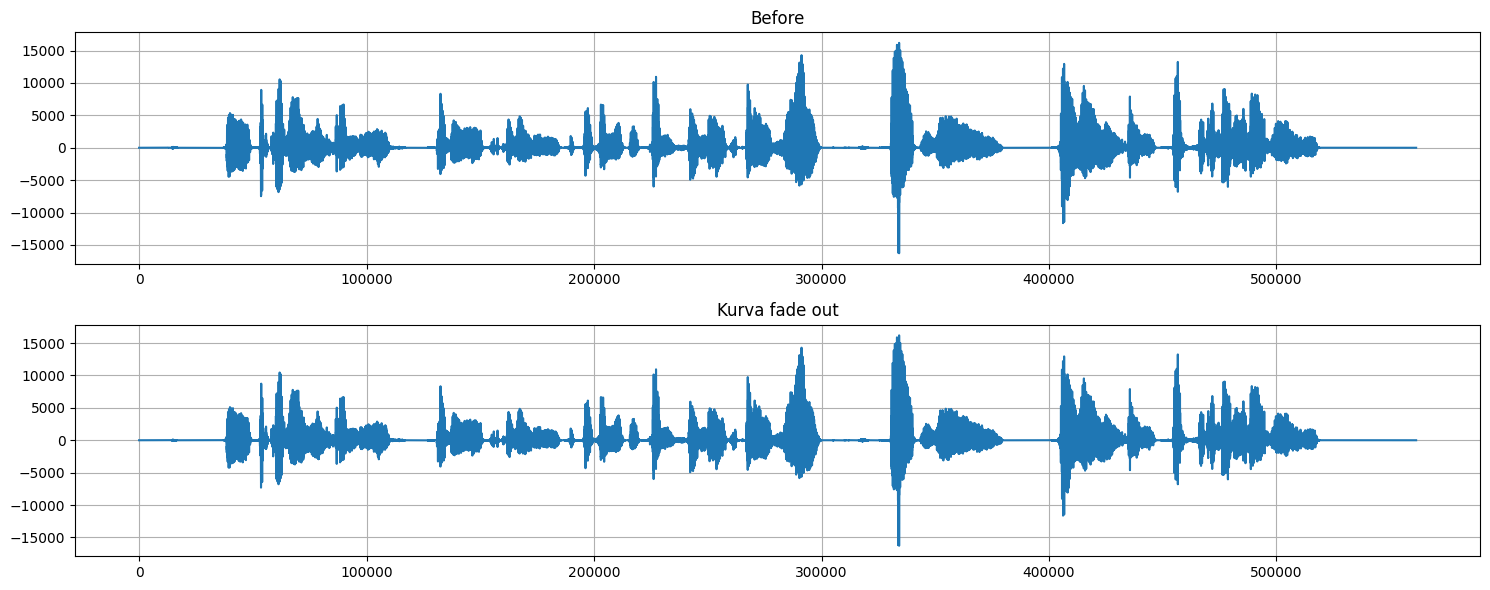

In [18]:
ax, fig = plt.subplots(2, 1, figsize=(15, 6))
fig[0].plot(
    np.frombuffer(audio_content, dtype=np.int16)
    )
fig[0].set_title("Before")
fig[0].grid()
fig[1].plot(
    audio_fadding
    )
fig[1].set_title("Kurva fade out")
fig[1].grid()
plt.tight_layout()
plt.show()